In [7]:
import pandas as pd
import numpy as np
from os import getcwd, listdir, path
import matplotlib.pyplot as plt
import utils
from fitness.soga_fitness_trueskills import *

In [8]:
fitness = []
ex_names = ['mog1_sketch0_30', 'if_sketch0_30', 'biasedtugwar_nosketch_30', 'easytugwar_sketch0']
labels = ['mog1', 'if', 'biasedtugwar', 'easytugwar']
for name in ex_names:
    file_path = path.join(getcwd(), "..", "results", name, "best_fitness.csv")
    data = pd.read_csv(file_path, header=None)
    #convert to numpy array
    data = data.values
    #compute median and interquartile range of each row
    median = np.median(data, axis=1)
    q1 = np.percentile(data, 25, axis=1)
    q3 = np.percentile(data, 75, axis=1)
    fitness.append([median, q1, q3])


In [9]:
np.shape(fitness[3][1])

(701,)

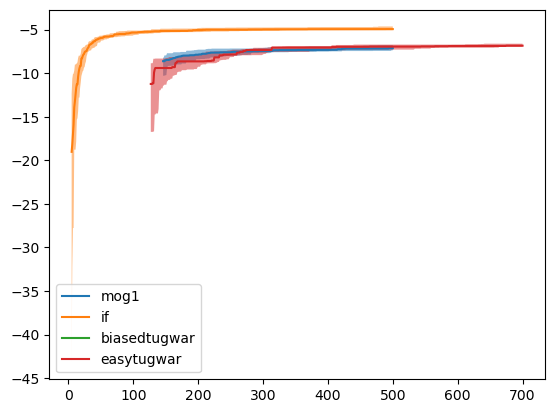

In [10]:
for i in range(len(ex_names)):
    plt.plot(range(len(fitness[i][0])), fitness[i][0], label=labels[i])
    plt.fill_between(range(len(fitness[i][0])), fitness[i][1], fitness[i][2], alpha=0.5)
plt.legend()
plt.show()

run  Rominas-Air.lan_25_1_17_095014_815238_71598_10  did not converge
run  Rominas-Air.lan_25_1_17_095014_815238_71598_10  did not converge
run  Rominas-Air.lan_25_1_17_095014_815238_71598_10  did not converge
run  Rominas-Air.lan_25_1_17_095014_815238_71598_10  did not converge


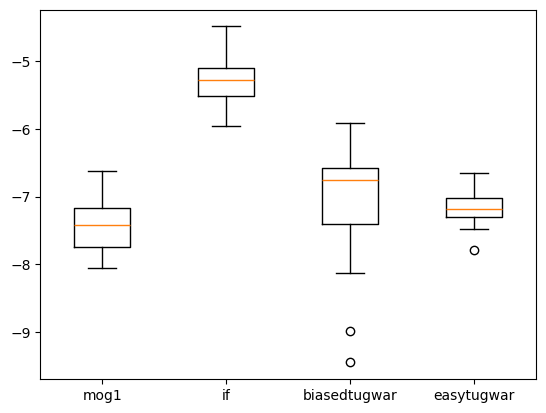

In [11]:
#create a boxplot with the median and the interquartile range
import pandas as pd
fitness_5000 = []
i = 0
for name in ex_names:
    fitness_5000_i, _ = utils.read_fitness_and_program(name)
    #remove nan values
    fitness_5000_i = np.array(fitness_5000_i)
    fitness_5000_i = fitness_5000_i[~np.isnan(fitness_5000_i)]
    #calculate the baseline
    path_baseline = path.join(getcwd(), "..", "baselines", labels[i] + ".soga")
    file = open(path_baseline)
    text_baseline = ''
    for line in file.readlines():
        text_baseline += line + ' '

    fitness_bl = likelihood_of_program_wrt_data(text_baseline)
    fitness_5000_i = (fitness_5000_i - fitness_bl) / fitness_bl
    fitness_5000.append(fitness_5000_i)
    i += 1

plt.boxplot(fitness_5000, labels=labels)
plt.show()

